In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from datetime import date
import math

In [2]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [3]:
data = pd.read_csv('RELIANCE.NS.csv',index_col='Date')
data = data[['Adj Close']]  # Assuming 'Date' is the column containing dates
data.columns = ['Price']
data.head()

,Price
Date,
2000-01-03,26.684862
2000-01-04,28.821138
2000-01-05,29.950232
2000-01-06,31.206556
2000-01-07,33.348125


In [4]:
data.index

Index(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
       '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13', '2000-01-14',
       ...
       '2024-06-10', '2024-06-11', '2024-06-12', '2024-06-13', '2024-06-14',
       '2024-06-18', '2024-06-19', '2024-06-20', '2024-06-21', '2024-06-24'],
      dtype='object', name='Date', length=6116)

In [5]:
print('There are {} number of days in the dataset.'.format(data.shape[0]))

There are 6116 number of days in the dataset.


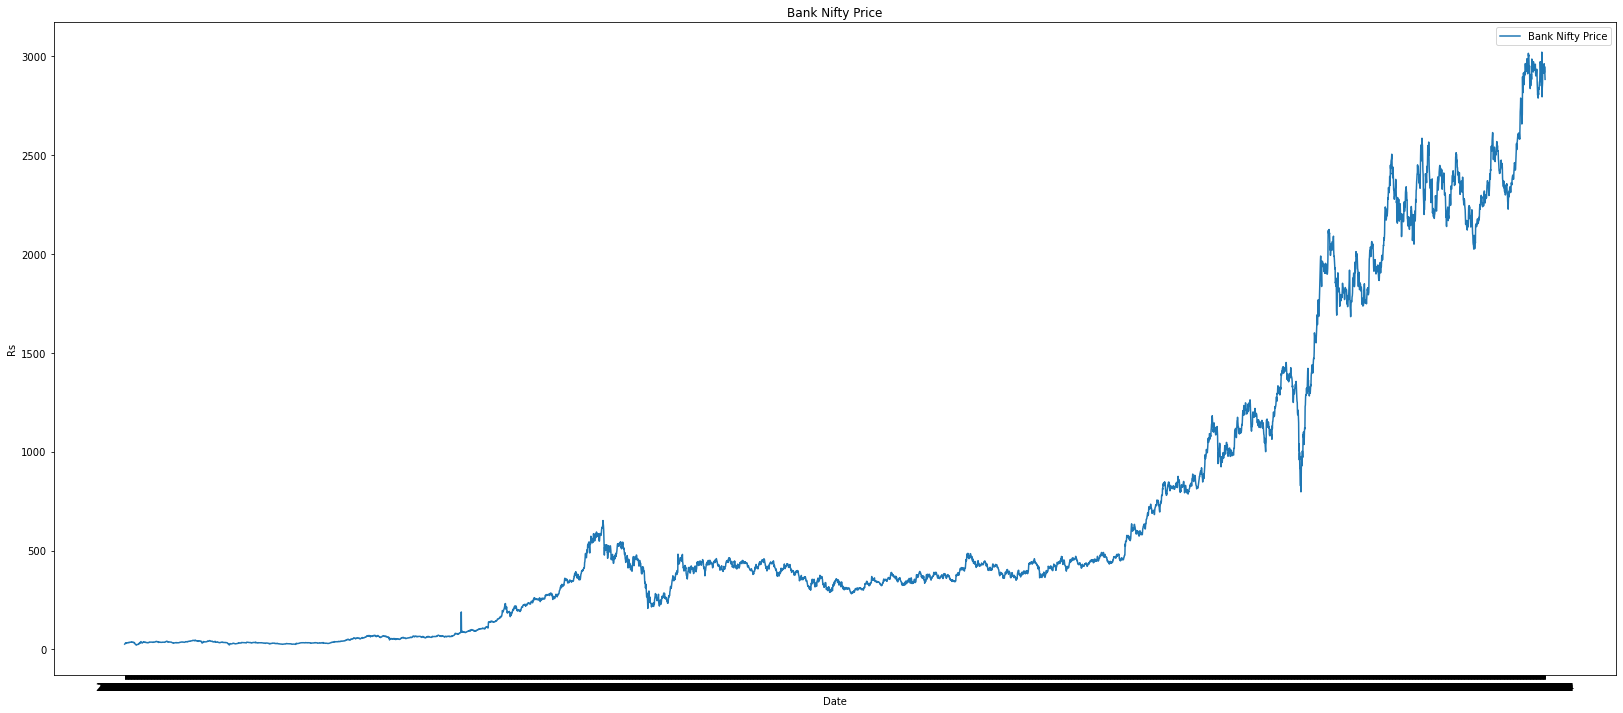

In [8]:
plt.figure(figsize=(28, 12))#, dpi=100)
plt.plot(data.index.values, data['Price'].values, label='Reliance Price')
plt.xlabel('Date')
plt.ylabel('Rs')
plt.title('Bank Nifty Price')
plt.legend()
plt.show()

In [9]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['Price'].rolling(window=7).mean()
    dataset['ma21'] = dataset['Price'].rolling(window=21).mean()
    
    # Create MACD
    dataset['26ema'] = dataset['Price'].ewm(span=26).mean()
    dataset['12ema'] = dataset['Price'].ewm(span=12).mean()
    dataset['MACD'] = dataset['12ema']-dataset['26ema']

    # Create Bollinger Bands
    dataset['20sd'] = dataset['Price'].rolling(window = 21).std()
    dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    
    # Create Exponential moving average
    dataset['ema'] = dataset['Price'].ewm(com=0.5).mean()
    
    # Create Momentum
    dataset['momentum'] = dataset['Price']-1
    dataset['log_momentum'] = np.log(dataset['momentum'])
    return dataset

In [10]:
df = get_technical_indicators(data)

In [11]:
df = df.dropna()
df.head()

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2000-01-31,34.789978,34.741519,32.770076,33.572620,34.223216,0.650596,2.253596,37.277268,28.262884,35.053645,33.789978,3.520164
2000-02-01,35.415493,34.858140,33.185820,33.739899,34.411413,0.671514,1.842723,36.871267,29.500374,35.294877,34.415493,3.538507
2000-02-02,36.062199,35.070176,33.530633,33.947233,34.670946,0.723713,1.652859,36.836351,30.224914,35.806425,35.062199,3.557124
2000-02-03,36.221230,35.398832,33.829252,34.147214,34.913859,0.766645,1.536006,36.901264,30.757240,36.082962,35.221230,3.561649
2000-02-04,36.486279,35.765352,34.080667,34.350104,35.159542,0.809438,1.517237,37.115140,31.046194,36.351840,35.486279,3.569146


In [12]:
def plot_technical_indicators(dataset, last_days):
    plt.figure(figsize=(16, 10), dpi=100)
    shape_0 = dataset.shape[0]
    xmacd_ = shape_0-last_days
    
    dataset = dataset.iloc[-last_days:, :]
    x_ = range(3, dataset.shape[0])
    x_ =list(dataset.index)

    plt.figure(figsize=(30,20))
    # Plot first subplot
    plt.subplot(2, 1, 1)
    plt.plot(dataset['ma7'],label='MA 7', color='g',linestyle='--')
    plt.plot(dataset['Price'],label='Closing Price', color='b')
    plt.plot(dataset['ma21'],label='MA 21', color='r',linestyle='--')
    plt.plot(dataset['upper_band'],label='Upper Band', color='c')
    plt.plot(dataset['lower_band'],label='Lower Band', color='c')
    plt.fill_between(x_, dataset['lower_band'], dataset['upper_band'], alpha=0.35)
    plt.title('Technical indicators for Goldman Sachs - last {} days.'.format(last_days))
    plt.ylabel('USD')
    plt.legend()

    # Plot second subplot

    plt.subplot(2, 1, 2)
    plt.title('MACD')
    plt.plot(dataset['MACD'],label='MACD', linestyle='-.')
#     plt.hlines(15, xmacd_, shape_0, colors='g', linestyles='--')
#     plt.hlines(-15, xmacd_, shape_0, colors='g', linestyles='--')
    plt.plot(dataset['log_momentum'],label='Momentum', color='b',linestyle='-')

    plt.legend()
    plt.show()

<Figure size 1600x1000 with 0 Axes>

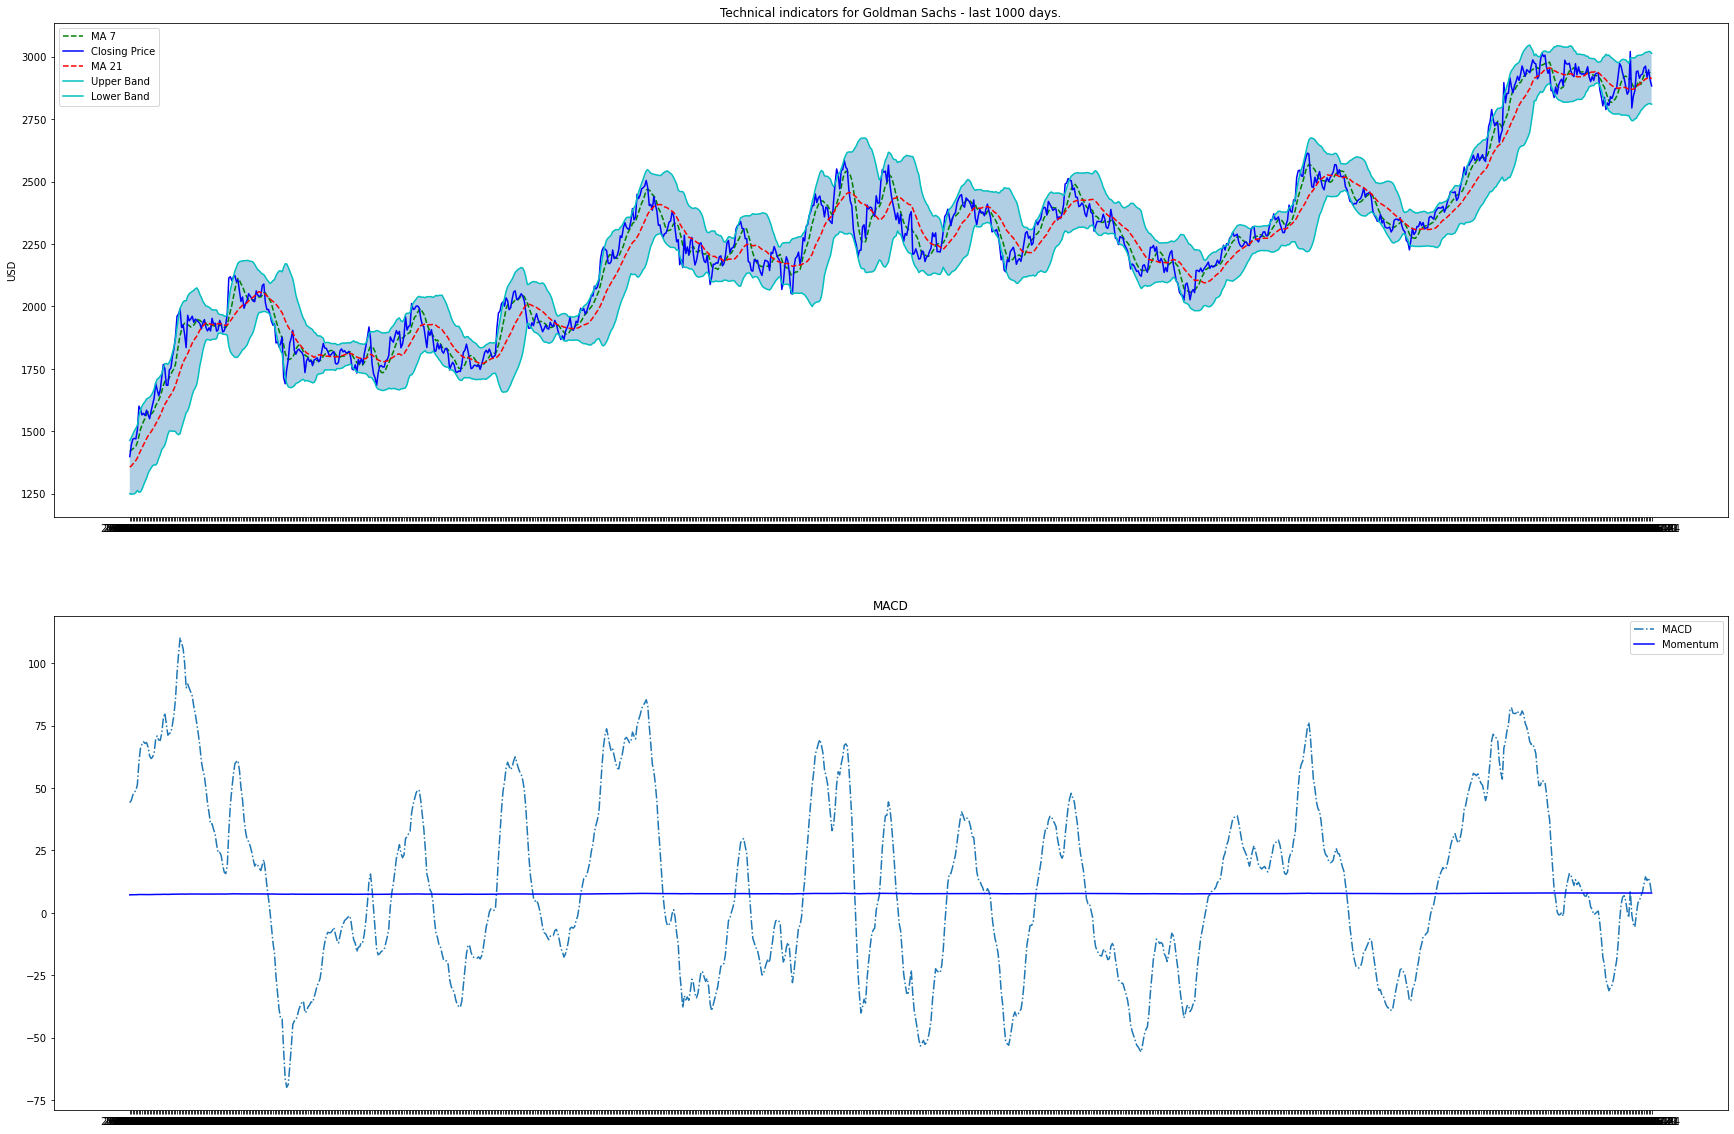

In [13]:
plot_technical_indicators(df, 1000)

Text(0.5, 1.0, 'Params')

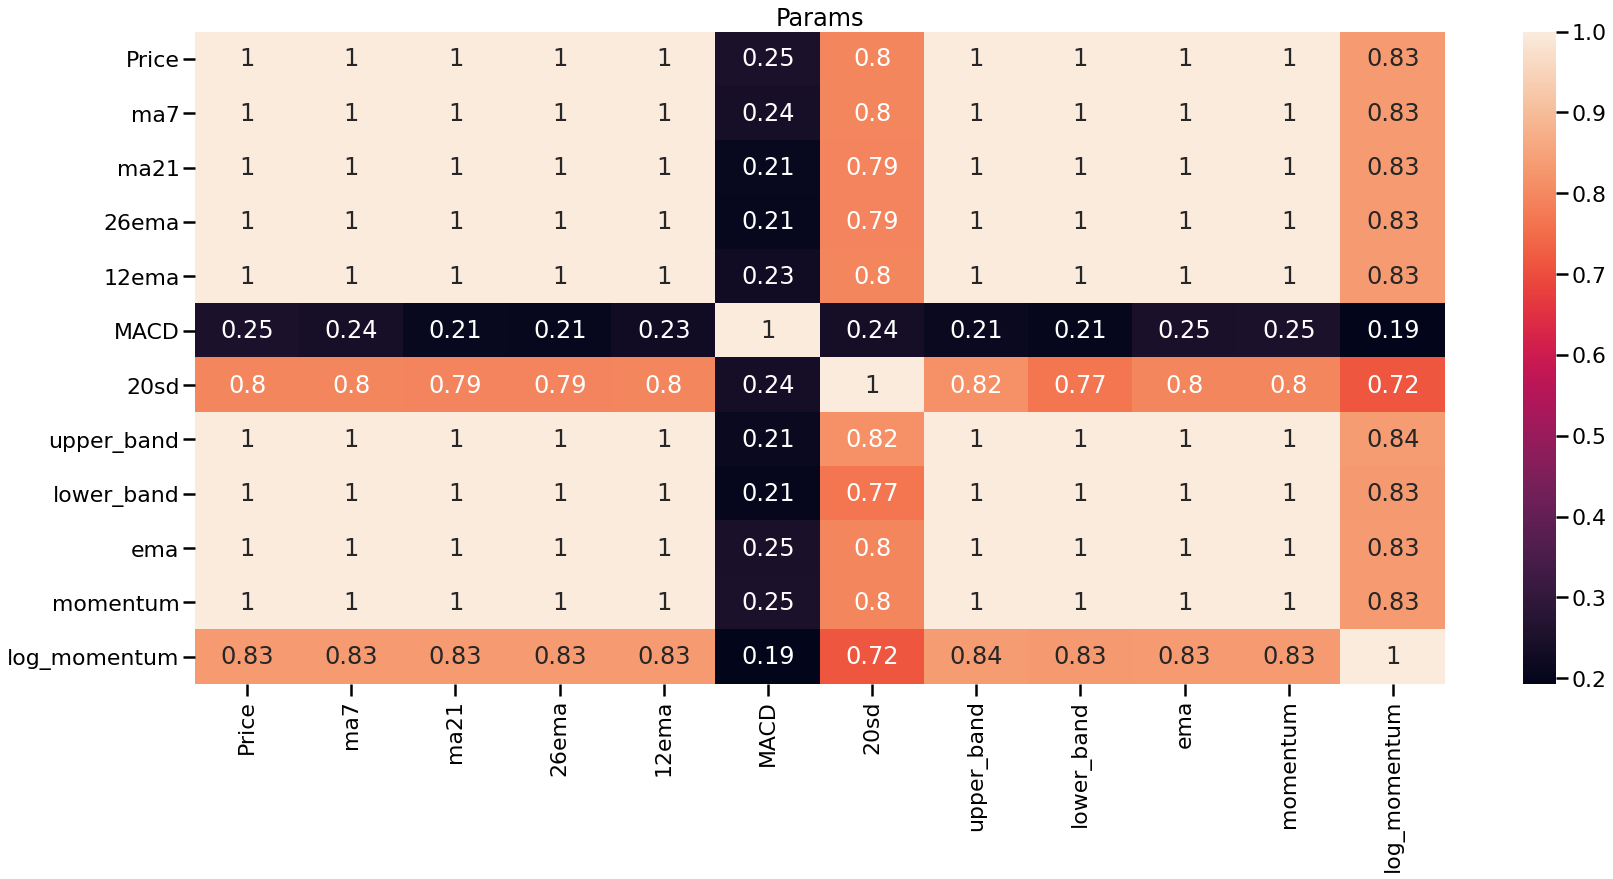

In [14]:
plt.figure(figsize = (28,12))
sns.set_context('poster',font_scale=1)
sns.heatmap(df.corr(), annot = True).set_title('Params')


In [15]:
print('Total dataset has {} samples, and {} features.'.format(df.shape[0], \
                                                              df.shape[1]))

Total dataset has 5886 samples, and 12 features.


In [16]:
df.columns

Index(['Price', 'ma7', 'ma21', '26ema', '12ema', 'MACD', '20sd', 'upper_band',
       'lower_band', 'ema', 'momentum', 'log_momentum'],
      dtype='object')

In [17]:
df

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2000-01-31,34.789978,34.741519,32.770076,33.572620,34.223216,0.650596,2.253596,37.277268,28.262884,35.053645,33.789978,3.520164
2000-02-01,35.415493,34.858140,33.185820,33.739899,34.411413,0.671514,1.842723,36.871267,29.500374,35.294877,34.415493,3.538507
2000-02-02,36.062199,35.070176,33.530633,33.947233,34.670946,0.723713,1.652859,36.836351,30.224914,35.806425,35.062199,3.557124
2000-02-03,36.221230,35.398832,33.829252,34.147214,34.913859,0.766645,1.536006,36.901264,30.757240,36.082962,35.221230,3.561649
2000-02-04,36.486279,35.765352,34.080667,34.350104,35.159542,0.809438,1.517237,37.115140,31.046194,36.351840,35.486279,3.569146
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18,2962.050049,2938.621443,2910.702381,2907.847167,2922.302406,14.455239,53.241678,3017.185738,2804.219024,2956.772649,2961.050049,7.993299
2024-06-19,2917.300049,2935.392892,2912.888102,2908.547381,2921.532813,12.985432,52.484305,3017.856713,2807.919492,2930.457582,2916.300049,7.978071
2024-06-20,2947.399902,2936.050014,2916.466669,2911.425345,2925.512365,14.087020,52.135749,3020.738166,2812.195172,2941.752462,2946.399902,7.988339


In [18]:
data_training = df[df.index < '2019-01-31'].copy()
data_training

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2000-01-31,34.789978,34.741519,32.770076,33.572620,34.223216,0.650596,2.253596,37.277268,28.262884,35.053645,33.789978,3.520164
2000-02-01,35.415493,34.858140,33.185820,33.739899,34.411413,0.671514,1.842723,36.871267,29.500374,35.294877,34.415493,3.538507
2000-02-02,36.062199,35.070176,33.530633,33.947233,34.670946,0.723713,1.652859,36.836351,30.224914,35.806425,35.062199,3.557124
2000-02-03,36.221230,35.398832,33.829252,34.147214,34.913859,0.766645,1.536006,36.901264,30.757240,36.082962,35.221230,3.561649
2000-02-04,36.486279,35.765352,34.080667,34.350104,35.159542,0.809438,1.517237,37.115140,31.046194,36.351840,35.486279,3.569146
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-24,1117.653442,1075.306798,1021.351388,1031.556419,1057.855683,26.299263,46.610274,1114.571936,928.130840,1111.523392,1116.653442,7.018091
2019-01-25,1116.354126,1089.398821,1026.718558,1037.837731,1066.855443,29.017712,50.772713,1128.263985,925.173131,1114.743881,1115.354126,7.016927
2019-01-28,1101.615723,1101.570940,1031.155648,1042.562027,1072.203178,29.641152,53.112752,1137.381153,924.930144,1105.991776,1100.615723,7.003625


In [19]:
data_testing = df[df.index >= '2019-01-31'].copy()
data_testing

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
Date,,,,,,,,,,,,
2019-01-31,1099.465454,1098.537545,1043.308579,1051.422235,1077.652804,26.230569,54.518584,1152.345747,934.271411,1092.350435,1098.465454,7.001669
2019-02-01,1119.893066,1101.564575,1050.015404,1056.494148,1084.151306,27.657158,54.880276,1159.775956,940.254852,1110.712189,1118.893066,7.020095
2019-02-04,1156.582275,1107.125837,1058.217617,1063.908084,1095.294532,31.386448,57.387621,1172.992859,943.442374,1141.292246,1155.582275,7.052360
2019-02-05,1157.164551,1112.955898,1066.187300,1070.815970,1104.812997,33.997026,59.009592,1184.206484,948.168115,1151.873783,1156.164551,7.052863
2019-02-06,1173.918823,1123.284912,1074.959075,1078.453218,1115.444662,36.991444,60.738931,1196.436937,953.481212,1166.570476,1172.918823,7.067251
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-18,2962.050049,2938.621443,2910.702381,2907.847167,2922.302406,14.455239,53.241678,3017.185738,2804.219024,2956.772649,2961.050049,7.993299
2024-06-19,2917.300049,2935.392892,2912.888102,2908.547381,2921.532813,12.985432,52.484305,3017.856713,2807.919492,2930.457582,2916.300049,7.978071
2024-06-20,2947.399902,2936.050014,2916.466669,2911.425345,2925.512365,14.087020,52.135749,3020.738166,2812.195172,2941.752462,2946.399902,7.988339


In [20]:
scalar = MinMaxScaler()

data_training_scaled = scalar.fit_transform(data_training)
print(data_training_scaled.shape)
data_training_scaled

(4557, 12)


array([[0.01141772, 0.0096792 , 0.00608066, ..., 0.01116356, 0.01141772,
        0.12283319],
       [0.01195685, 0.00978289, 0.00645939, ..., 0.01137345, 0.01195685,
        0.12736067],
       [0.01251425, 0.00997142, 0.00677351, ..., 0.01181853, 0.01251425,
        0.13195581],
       ...,
       [0.9309242 , 0.95825614, 0.91558657, ..., 0.94295583, 0.9309242 ,
        0.98265108],
       [0.91632919, 0.96124924, 0.91906121, ..., 0.93059536, 0.91632919,
        0.97882402],
       [0.90478433, 0.95646941, 0.92196452, ..., 0.91870575, 0.90478433,
        0.97575416]])

In [21]:
X_train = []
y_train = []

In [22]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training_scaled[i-60: i])
    y_train.append(data_training_scaled[i, 0])

In [23]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

((4497, 60, 12), (4497,))

In [24]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 12)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units = 120, activation = 'relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [25]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            12600     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            26640     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [27]:
regressor.fit(X_train, y_train, epochs=50, batch_size = 64)

Epoch 1/50
71/71 [==============================] - 20s 201ms/step - loss: 0.0180
Epoch 2/50
71/71 [==============================] - 14s 199ms/step - loss: 0.0043
Epoch 3/50
71/71 [==============================] - 15s 218ms/step - loss: 0.0037
Epoch 4/50
71/71 [==============================] - 14s 194ms/step - loss: 0.0036
Epoch 5/50
71/71 [==============================] - 14s 192ms/step - loss: 0.0029
Epoch 6/50
71/71 [==============================] - 14s 190ms/step - loss: 0.0026
Epoch 7/50
71/71 [==============================] - 14s 191ms/step - loss: 0.0025
Epoch 8/50
71/71 [==============================] - 14s 192ms/step - loss: 0.0024
Epoch 9/50
71/71 [==============================] - 14s 192ms/step - loss: 0.0022
Epoch 10/50
71/71 [==============================] - 14s 193ms/step - loss: 0.0021
Epoch 11/50
71/71 [==============================] - 14s 198ms/step - loss: 0.0021
Epoch 12/50
71/71 [==============================] - 13s 189ms/step - loss: 0.0023
Epoch 13/50
7

In [29]:

past_60 = data_training.tail(60)
dt = pd.concat([past_60, data_testing], ignore_index=True)
dt

,Price,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum,log_momentum
0,976.854675,956.414193,972.199989,991.936188,965.494146,-26.442042,33.306528,1038.813045,905.586933,970.575666,975.854675,6.883314
1,989.218750,963.991377,974.557193,991.734896,969.144085,-22.590811,32.637659,1039.832511,909.281875,983.004389,988.218750,6.895904
2,995.131958,966.922398,974.612653,991.986530,973.142219,-18.844311,32.673262,1039.959177,909.266130,991.089435,994.131958,6.901870
3,979.676941,971.587742,974.757714,991.074709,974.147561,-16.927148,32.689427,1040.136568,909.378859,983.481106,978.676941,6.886202
4,967.626343,973.987610,973.814828,989.337793,973.144297,-16.193496,32.591142,1038.997112,908.632544,972.911264,966.626343,6.873812
...,...,...,...,...,...,...,...,...,...,...,...,...
1384,2962.050049,2938.621443,2910.702381,2907.847167,2922.302406,14.455239,53.241678,3017.185738,2804.219024,2956.772649,2961.050049,7.993299
1385,2917.300049,2935.392892,2912.888102,2908.547381,2921.532813,12.985432,52.484305,3017.856713,2807.919492,2930.457582,2916.300049,7.978071
1386,2947.399902,2936.050014,2916.466669,2911.425345,2925.512365,14.087020,52.135749,3020.738166,2812.195172,2941.752462,2946.399902,7.988339
1387,2908.399902,2935.342843,2915.852376,2911.201238,2922.879678,11.678440,52.151947,3020.156271,2811.548481,2919.517422,2907.399902,7.975014


In [30]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(1389, 12)


array([[0.08095731, 0.04107137, 0.00699719, ..., 0.06497605, 0.08095731,
        0.15293424],
       [0.08651712, 0.04466523, 0.00817749, ..., 0.07069148, 0.08651712,
        0.1623757 ],
       [0.08917614, 0.04605541, 0.00820526, ..., 0.07440944, 0.08917614,
        0.16684946],
       ...,
       [0.96706134, 0.98001166, 0.98053034, ..., 0.97143485, 0.96706134,
        0.981585  ],
       [0.94952403, 0.97967625, 0.98022275, ..., 0.96120992, 0.94952403,
        0.97159277],
       [0.93807984, 0.97671527, 0.97809708, ..., 0.94999939, 0.93807984,
        0.96499968]])

In [31]:
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((1329, 60, 12), (1329,))

In [32]:
y_pred = regressor.predict(X_test)

In [33]:
y_pred

array([[0.07455432],
       [0.07605828],
       [0.07768607],
       ...,
       [0.7505208 ],
       [0.7514173 ],
       [0.75164104]], dtype=float32)

In [34]:
scale = 1/scalar.scale_[0]

In [35]:
y_pred = y_pred*scale
y_test = y_test*scale

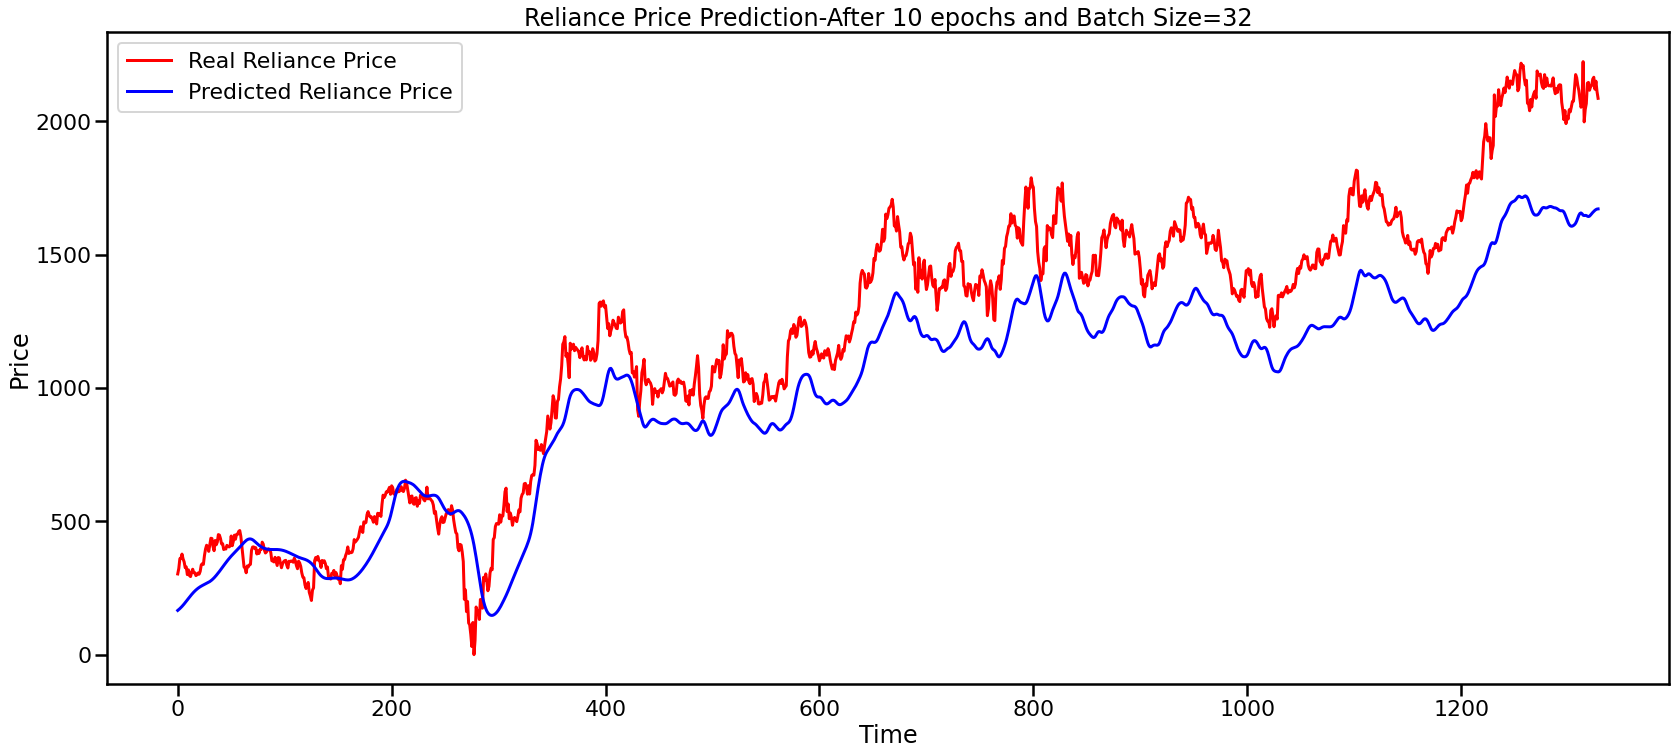

In [36]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Reliance Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Reliance Price')
plt.title('Reliance Price Prediction-After 10 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

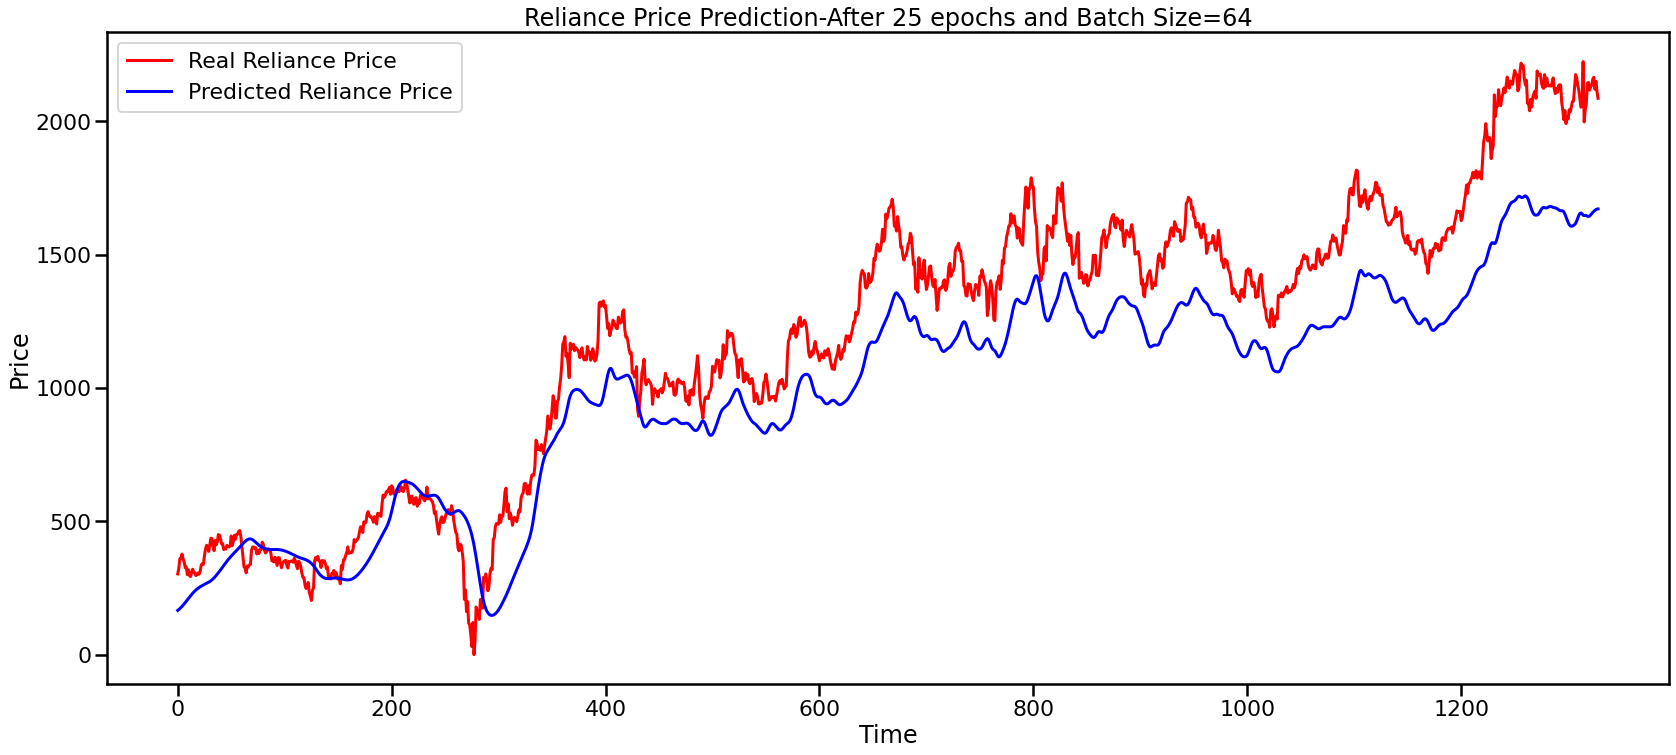

In [37]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Reliance Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Reliance Price')
plt.title('Reliance Price Prediction-After 25 epochs and Batch Size=64')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

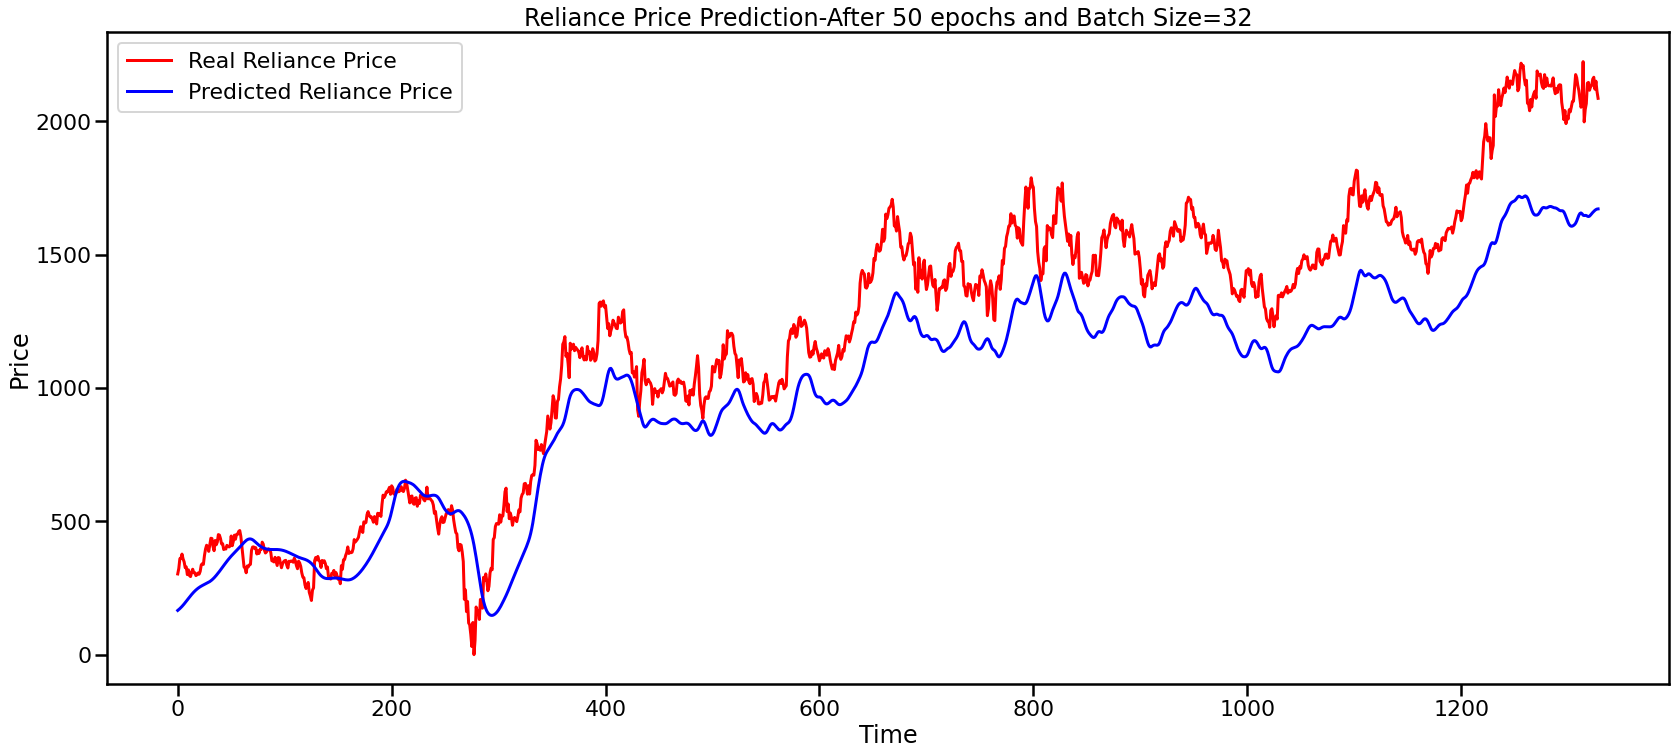

In [38]:
# Visualising the results
plt.figure(figsize=(28,12))
plt.plot(y_test, color = 'red', label = 'Real Reliance Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Reliance Price')
plt.title('Reliance Price Prediction-After 50 epochs and Batch Size=32')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()